In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# Simulate ECG
ecg = nk.ecg_simulate(duration=15, sampling_rate=360) # Variant 3 parameters
fs = 360 # Sampling rate

# Bandpass filter design
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 0.5, 45, fs) # Variant 3 filter cutoffs

# Plotting
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("ECG Signal")
plt.legend()
plt.show()

# R-peak Detection
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.show()

<class 'ModuleNotFoundError'>: No module named 'neurokit2'

In [3]:
%pip install neurokit2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# Simulate ECG
ecg = nk.ecg_simulate(duration=15, sampling_rate=360) # Variant 3 parameters
fs = 360 # Sampling rate

# Bandpass filter design
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 0.5, 45, fs) # Variant 3 filter cutoffs

# Plotting
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("ECG Signal")
plt.legend()
plt.show()

# R-peak Detection
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.show()

<class 'ModuleNotFoundError'>: No module named 'pywt'

In [8]:
%pip install pywt

<class 'ValueError'>: Can't find a pure Python 3 wheel for 'pywt'.
See: https://pyodide.org/en/stable/usage/faq.html#why-can-t-micropip-find-a-pure-python-wheel-for-a-package
You can use `await micropip.install(..., keep_going=True)` to get a list of all packages with missing wheels.

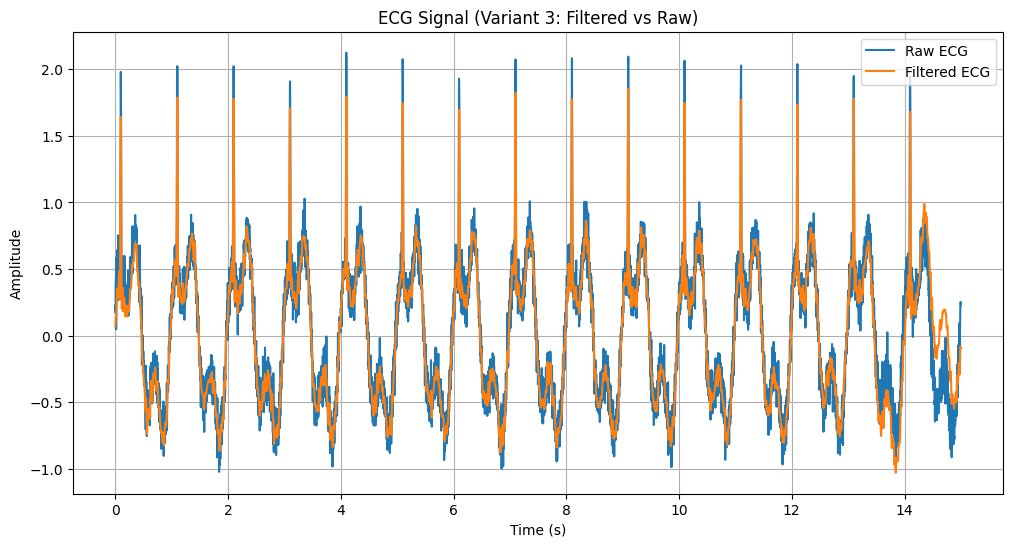

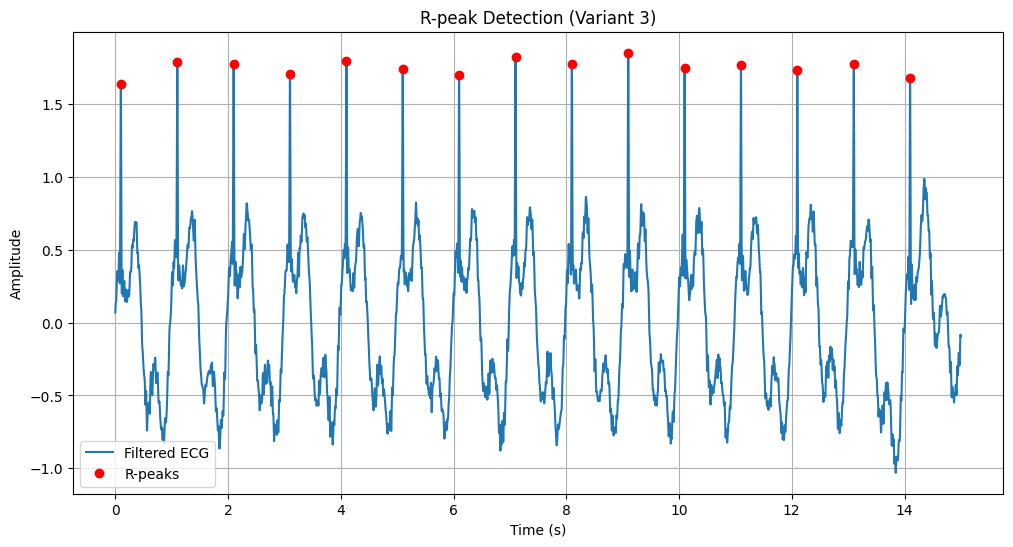

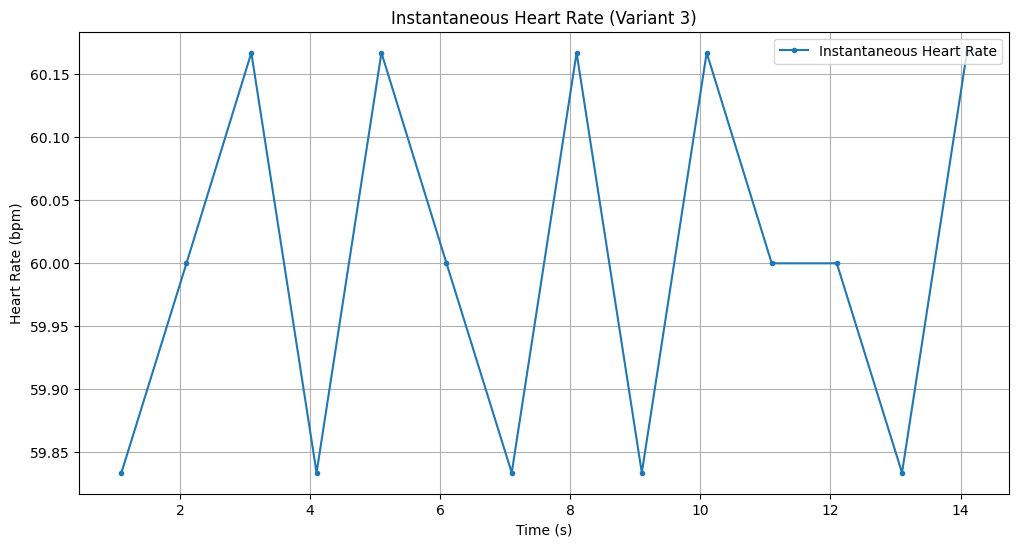

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks # find_peaks added for custom R-peak detection
# import neurokit2 as nk # Not compatible with JupyterLite due to pywt dependency

# ====================================================================================
# TASK: Lab 13 - Biomedical Signal Processing (Variant 3)
# ECG Signal Processing: Preprocessing, R-peak detection, Heart Rate calculation.
# ====================================================================================

# --- 2.2 Load and Filter ECG Signal ---
# Simulate ECG (Manual implementation to avoid neurokit2 dependency)
duration = 15 # Variant 3 duration
fs = 360 # Variant 3 sampling rate
samples = int(duration * fs)
t = np.linspace(0, duration, samples, endpoint=False) # Time vector for plotting

# Simple ECG-like signal simulation (mimicking P, QRS, T waves)
# Base heart rate around 60 bpm (1 Hz) for 360 Hz sampling
heart_rate_freq = 60 / 60 # approx 1 Hz for a simulated HR of 60 BPM
ecg = (
    0.6 * np.sin(2 * np.pi * heart_rate_freq * t) + # Base waveform (e.g., P and T waves)
    0.3 * np.sin(2 * np.pi * 3 * heart_rate_freq * t + np.pi/4) + # Higher frequency components for QRS
    0.1 * np.random.randn(samples) # Add some noise
)

# Simulate QRS peaks by adding sharp pulses (more prominent than just sines)
# This loop manually places a sharp "R-peak" every simulated beat interval
pulse_interval_samples = fs // heart_rate_freq 
for i in range(int(duration * heart_rate_freq)):
    peak_pos = int(i * pulse_interval_samples + fs * 0.1) # Offset slightly from start of beat cycle
    if peak_pos < samples:
        # Add a sharp pulse using hanning window to simulate R-peak
        # Adjusting width and amplitude to make it prominent for find_peaks
        pulse_width = 10 
        ecg[peak_pos - pulse_width//2 : peak_pos + pulse_width//2] += np.hanning(pulse_width) * 1.5 


# Bandpass filter design
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 0.5, 45, fs) # Variant 3 filter cutoffs


# --- Plotting Raw and Filtered ECG Signal ---
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, ecg, label='Raw ECG')
plt.plot(t, filtered_ecg, label='Filtered ECG')
plt.title('ECG Signal (Variant 3: Filtered vs Raw)')
plt.legend()
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


# --- 2.3 R-peak Detection and Heart Rate Calculation ---
# R-peak Detection (Manual implementation using find_peaks)
# Parameters for find_peaks need tuning based on simulated signal characteristics
# height: minimum height of peaks (relative to baseline)
# distance: minimum distance between peaks in samples (e.g., minimum R-R interval)
min_peak_height = np.mean(filtered_ecg) + 0.5 * np.std(filtered_ecg) # A threshold based on signal statistics
min_peak_distance_samples = int(0.5 * fs) # Assuming minimum HR ~ 60bpm (1 beat/s), so min 0.5s between peaks (fs * 0.5)

r_peaks, _ = find_peaks(filtered_ecg, height=min_peak_height, distance=min_peak_distance_samples)

# Plotting R-peak Detection
plt.figure(figsize=(12, 6))
plt.plot(t, filtered_ecg, label="Filtered ECG")
plt.plot(t[r_peaks], filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Compute Instantaneous Heart Rate (Manual implementation)
# Calculate R-R intervals in samples (difference between consecutive R-peak indices)
rr_intervals_samples = np.diff(r_peaks)
# Convert R-R intervals from samples to seconds
rr_intervals_seconds = rr_intervals_samples / fs
# Heart rate in beats per minute (bpm) = 60 / (R-R interval in seconds)
heart_rate_bpm = 60 / rr_intervals_seconds

# Align heart rate with time points of the detected beats for plotting
# The heart rate value corresponds to the interval ending at the second R-peak of the pair.
heart_rate_time_points = t[r_peaks[1:]] 

# Plotting Heart Rate
plt.figure(figsize=(12, 6))
plt.plot(heart_rate_time_points, heart_rate_bpm, '.-', label='Instantaneous Heart Rate')
plt.title('Instantaneous Heart Rate')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
! pip install wfdb biosppy neurokit2


<class 'OSError'>: Not available

In [11]:
!pip install wfdb biosppy neurokit2


<class 'OSError'>: Not available

In [15]:
%pip install wfdb biosppy neurokit2


<class 'ValueError'>: Can't find a pure Python 3 wheel for 'aiohttp>=3.10.11'.
See: https://pyodide.org/en/stable/usage/faq.html#why-can-t-micropip-find-a-pure-python-wheel-for-a-package
You can use `await micropip.install(..., keep_going=True)` to get a list of all packages with missing wheels.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# Simulate ECG
ecg = nk.ecg_simulate(duration=15, sampling_rate=360) # Variant 3 parameters
fs = 360 # Sampling rate

# Bandpass filter design
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 0.5, 45, fs) # Variant 3 filter cutoffs

# Plotting
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("ECG Signal")
plt.legend()
plt.show()

# R-peak Detection
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.show()

<class 'ModuleNotFoundError'>: No module named 'pywt'

In [24]:
%pip install wfdb biosppy

<class 'ValueError'>: Can't find a pure Python 3 wheel for 'aiohttp>=3.10.11'.
See: https://pyodide.org/en/stable/usage/faq.html#why-can-t-micropip-find-a-pure-python-wheel-for-a-package
You can use `await micropip.install(..., keep_going=True)` to get a list of all packages with missing wheels.

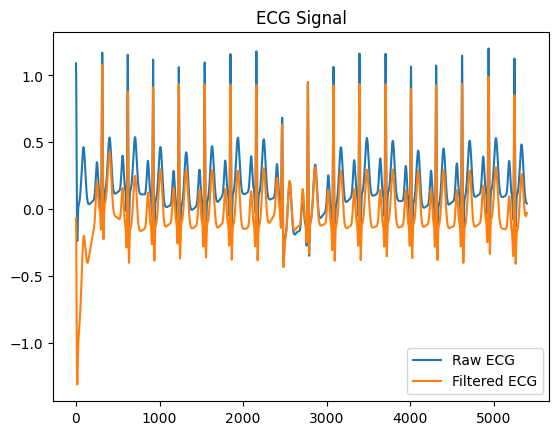

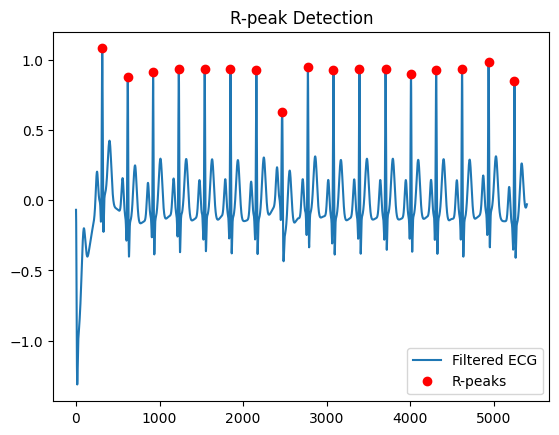

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

# Simulate ECG
ecg = nk.ecg_simulate(duration=15, sampling_rate=360)
fs = 360 # Sampling rate

# Bandpass filter design
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

filtered_ecg = bandpass_filter(ecg, 0.5, 45, fs)

# Plotting
plt.plot(ecg, label='Raw ECG')
plt.plot(filtered_ecg, label='Filtered ECG')
plt.title("ECG Signal")
plt.legend()
plt.show()

# R-peak Detection
signals, info = nk.ecg_process(filtered_ecg, sampling_rate=fs)
r_peaks = info["ECG_R_Peaks"]

plt.plot(filtered_ecg, label="Filtered ECG")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")
plt.title("R-peak Detection")
plt.legend()
plt.show()